<a href="https://colab.research.google.com/github/juunnn/DTSAI2019/blob/master/D27_JunaediFahmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam Classification (NLP)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp ./drive/My\ Drive/Day\ 27/*.csv .

## Data Loading

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
df.columns = "label text t1 t2 t2".split()
df.head()

,label,text,t1,t2,t2
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Text(0, 0.5, 'Count')

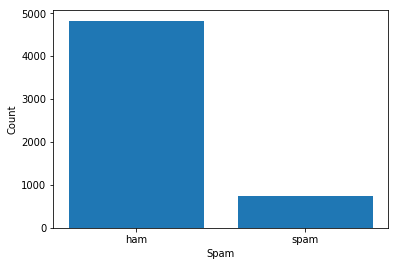

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

spam_count = df.groupby('label').count()

plt.bar(spam_count.index.values, spam_count['text'])
plt.xlabel('Spam')
plt.ylabel('Count')


## Data Cleansing

In [0]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Removing Stopwords

In [0]:
stop_words = nltk.corpus.stopwords.words("english")

text = df.text
text.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

In [0]:
# Stop word delim
text = text.apply(lambda x: ' '.join(term for term in x.split() if term not in set(stop_words)))
text.head()

0    Go jurong point, crazy.. Available bugis n gre...
1                        Ok lar... Joking wif u oni...
2    Free entry 2 wkly comp win FA Cup final tkts 2...
3            U dun say early hor... U c already say...
4            Nah I think goes usf, lives around though
Name: text, dtype: object

### Masking

In [0]:
text = text.str.replace(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b' , 'emailadd')#email regex
text = text.str.replace(r'(http[s]?\S+) | (\w+\.[A-Za-z]{2,4}\S*)' , 'httpaddr') # url regex
text = text.str.replace(r'\b(\+\d{1,2}\s)?\d?[\-(.]\d{3}\)?\d{3}[\s.-]?\d{4}\b','phone') #phone regex
text = text.str.replace(r'\d+(\.\d+)?','numbr')    # number regex
text.head()

0    Go jurong point, crazy.. Available bugis n gre...
1                        Ok lar... Joking wif u oni...
2    Free entry numbr wkly comp win FA Cup final tk...
3            U dun say early hor... U c already say...
4            Nah I think goes usf, lives around though
Name: text, dtype: object

### Delete spaces

In [0]:
text = text.str.lower() # to lower case
text = text.str.replace(r'[^\w\d\s]',' ')
text = text.str.replace(r'\s+',' ')
text = text.str.replace(r'^\s+|\s+?$','')
text.head()

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry numbr wkly comp win fa cup final tk...
3                  u dun say early hor u c already say
4             nah i think goes usf lives around though
Name: text, dtype: object

### Stemming

In [0]:
porter = nltk.PorterStemmer()

df.text = text.apply(lambda x: ' '.join([porter.stem(term) for term in x.split()]))
df.head()

,label,text,t1,t2,t2
0,ham,go jurong point crazi avail bugi n great world...,NaN,NaN,NaN
1,ham,ok lar joke wif u oni,NaN,NaN,NaN
2,spam,free entri numbr wkli comp win fa cup final tk...,NaN,NaN,NaN
3,ham,u dun say earli hor u c alreadi say,NaN,NaN,NaN
4,ham,nah i think goe usf live around though,NaN,NaN,NaN


## Feature Engieering

### Vektorisasi

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,1), tokenizer=token.tokenize)
text1 = cv.fit_transform(text)
text1

<5572x7741 sparse matrix of type '<class 'numpy.int64'>'
	with 44353 stored elements in Compressed Sparse Row format>

In [0]:
text2 = text.apply(lambda x: ' '.join([porter.stem(term) for term in x.split()] ))
text2 = cv.fit_transform(text2)
text2

<5572x6463 sparse matrix of type '<class 'numpy.int64'>'
	with 44616 stored elements in Compressed Sparse Row format>

## Feature Extraction

In [0]:
s = ' '.join(df.text)
print(s)
str_list = s.lower().split()
print(len(str_list))
unique_words = set(str_list)
print(len(unique_words))
print(unique_words)

go jurong point crazi avail bugi n great world la e buffet cine got amor wat ok lar joke wif u oni free entri numbr wkli comp win fa cup final tkt numbrst may numbr text fa numbr receiv entri question std txt rate t c s appli numbrovernumbr s u dun say earli hor u c alreadi say nah i think goe usf live around though freemsg hey darl numbr week s word back i d like fun still tb ok xxx std chg send å numbr rcv even brother like speak me they treat like aid patent as per request mell mell oru minnaminungint nurungu vettam set callertun caller press numbr copi friend callertun winner as valu network custom select receivea å numbr prize reward to claim call numbr claim code klnumbr valid numbr hour onli had mobil numbr month more u r entitl updat latest colour mobil camera free call the mobil updat co free numbr i m gonna home soon want talk stuff anymor tonight k i ve cri enough today six chanc win cash from numbr numbr numbr pound txt cshnumbr send numbr cost numbrp day numbrday numbr tsa

In [0]:
dictwords = dict()
for word in unique_words:
    dictwords[word] = [str_list.count(word)]

In [0]:
dataham = df[df.label == 'ham']
dataspam = df[df.label == 'spam']

In [0]:
sham = ' '.join(dataham.text)
sspam = ' '.join(dataspam.text)
sham_list = sham.lower().split()
sspam_list = sspam.lower().split()

In [0]:
for words in unique_words:
    iham = sham_list.count(words)
    ispam = sspam_list.count(words)

    dictwords[words].append(iham)
    dictwords[words].append(ispam)
    dictwords[words].append(ispam-iham)

In [0]:
dictwords['number']

[106, 68, 38, -30]

In [0]:
sortfreq = sorted(dictwords.items(), key=lambda x: x[1][3], reverse=True)

In [0]:
dictfreq = sortfreq[:100]
print(len(dict(dictfreq)))
dictfreq

100


[('numbr', [2897, 868, 2029, 1161]),
 ('å', [302, 4, 298, 294]),
 ('free', [283, 60, 223, 163]),
 ('txt', [187, 14, 173, 159]),
 ('numbrp', [150, 1, 149, 148]),
 ('mobil', [153, 14, 139, 125]),
 ('claim', [115, 0, 115, 115]),
 ('prize', [94, 0, 94, 94]),
 ('call', [659, 286, 373, 87]),
 ('tone', [86, 0, 86, 86]),
 ('stop', [166, 45, 121, 76]),
 ('servic', [78, 5, 73, 68]),
 ('nokia', [73, 3, 70, 67]),
 ('award', [67, 1, 66, 65]),
 ('cash', [89, 13, 76, 63]),
 ('repli', [162, 50, 112, 62]),
 ('to', [107, 24, 83, 59]),
 ('text', [230, 86, 144, 58]),
 ('urgent', [69, 6, 63, 57]),
 ('guarante', [50, 0, 50, 50]),
 ('contact', [74, 13, 61, 48]),
 ('min', [115, 36, 79, 43]),
 ('win', [79, 18, 61, 43]),
 ('collect', [60, 9, 51, 42]),
 ('numbrppm', [40, 0, 40, 40]),
 ('custom', [62, 11, 51, 40]),
 ('your', [131, 46, 85, 39]),
 ('cs', [37, 0, 37, 37]),
 ('rington', [37, 0, 37, 37]),
 ('rate', [42, 3, 39, 36]),
 ('voucher', [38, 1, 37, 36]),
 ('draw', [45, 5, 40, 35]),
 ('latest', [40, 3, 37, 34]

## Excercise 1
manual classification

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Manual prediction function

In [0]:
from nltk import word_tokenize

dictfreq = dict(dictfreq)

def pred(text):
    words = list(word_tokenize(text))
    spam = 0
    ham = 0
    for word in words:
        if word in dictfreq.keys():
            spam += dictfreq[word][2]
            ham += dictfreq[word][1]

    return 'spam' if spam > ham else 'ham'

In [0]:
text = df[df.label == 'spam'].values[2]
label = 'spam'

print(text[1])
print(label)
print(pred(text[1]))

winner as valu network custom select receivea å numbr prize reward to claim call numbr claim code klnumbr valid numbr hour onli
spam
spam


### Sampling

In [0]:
samples = df.sample(frac=0.75)
spam_count = samples.groupby('label').count()
print(spam_count)

       text  t1  t2  t2
label                  
ham    3627  37   9   5
spam    552   4   2   0


### Manual accuracy

In [0]:
import numpy as np

def check_acc(samples):
    true_pred = 0
    num_samples = len(samples.index)
    for _, sample in samples.iterrows():
        if pred(sample.text) == sample.label:
            true_pred += 1

    return (true_pred/num_samples)


In [0]:
print('accuracy from manual method with 75% sample is', check_acc(samples))

accuracy from manual method with 75% sample is 0.7707585546781527


## Machine Learning

In [0]:
data_text = cv.fit_transform(df.text)

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_text, df.label, test_size = 0.10, random_state = 1)

In [0]:
print(type(data_text))

<class 'scipy.sparse.csr.csr_matrix'>


In [0]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train,y_train)

model.score(x_test, y_test)

0.982078853046595

In [0]:
from sklearn.svm import SVC

model = SVC(gamma="scale")
model.fit(x_train,y_train)

model.score(x_test, y_test)

0.985663082437276

In [0]:
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(cv=10)
model.fit(x_train,y_train)

model.score(x_test, y_test)

0.9910394265232975

## Text Clustering



In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome"
             ]
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++',max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:,::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print("Cluster %d:"%i)
    for ind in order_centroids[i,:10]:
        print(' %s'%terms[ind])

print("\n")
print("prediction")

Y = vectorizer.transform(["chrome browser to open"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry"])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 google
 translate
 app
 feedback
 impressed
 map
 incredible
 extension
 promoter
 chrome
Cluster 1:
 cat
 best
 climbing
 ninja
 ve
 photo
 taken
 belly
 merley
 kitten


prediction
[0]
[1]


## NN for Text classification

### MLP

In [0]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
df["label_code"] = lb.fit_transform(df.label)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(data_text, df.label_code, test_size = 0.10, random_state = 1)

In [0]:
from keras.models import Sequential
from keras import layers

input_dim = x_train.shape[1]
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Using TensorFlow backend.
W0807 13:49:23.554792 140336270067584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0807 13:49:23.599638 140336270067584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0807 13:49:23.609207 140336270067584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0807 13:49:23.639124 140336270067584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0807 13:49:23.659872 14033627

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                64640     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 64,651
Trainable params: 64,651
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10,verbose=1, validation_split=0.1)

W0807 13:49:23.987744 140336270067584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 4512 samples, validate on 502 samples
Epoch 1/10
4512/4512 [==============================] - 4s 993us/step - loss: 0.4812 - acc: 0.9382 - val_loss: 0.2858 - val_acc: 0.9741
Epoch 2/10
4512/4512 [==============================] - 1s 131us/step - loss: 0.1985 - acc: 0.9852 - val_loss: 0.1392 - val_acc: 0.9861
Epoch 3/10
4512/4512 [==============================] - 1s 128us/step - loss: 0.1028 - acc: 0.9907 - val_loss: 0.0863 - val_acc: 0.9861
Epoch 4/10
4512/4512 [==============================] - 1s 129us/step - loss: 0.0634 - acc: 0.9938 - val_loss: 0.0615 - val_acc: 0.9880
Epoch 5/10
4512/4512 [==============================] - 1s 131us/step - loss: 0.0433 - acc: 0.9953 - val_loss: 0.0488 - val_acc: 0.9880
Epoch 6/10
4512/4512 [==============================] - 1s 128us/step - loss: 0.0317 - acc: 0.9960 - val_loss: 0.0410 - val_acc: 0.9900
Epoch 7/10
4512/4512 [==============================] - 1s 127us/step - loss: 0.0242 - acc: 0.9973 - val_loss: 0.0366 - val_acc: 0.9900
E

In [0]:
loss, accuracy = model.evaluate(x_train,y_train, verbose=True)
print("Training accuracy: {:.4f} with loss: {:.4f}".format(accuracy, loss))

5014/5014 [==============================] - 0s 66us/step
Training accuracy: 0.9978 with loss: 0.0130


In [0]:
loss, accuracy = model.evaluate(x_test,y_test, verbose=True)
print("Testing accuracy: {:.4f} with loss: {:.4f}".format(accuracy, loss))

558/558 [==============================] - 0s 71us/step
Testing accuracy: 0.9875 with loss: 0.0464


### LSTM

In [0]:
from keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense

model2 = Sequential()
model2.add(Embedding(len(unique_words), 50))
model2.add(Bidirectional(LSTM(32)))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [0]:
history = model2.fit(x_train, y_train, batch_size=100, epochs=3,verbose=1, validation_split=0.1)

Train on 4512 samples, validate on 502 samples
Epoch 1/10
4512/4512 [==============================] - 770s 171ms/step - loss: 0.4826 - acc: 0.8285 - val_loss: 0.3978 - val_acc: 0.8665
Epoch 2/10
4512/4512 [==============================] - 776s 172ms/step - loss: 0.3984 - acc: 0.8644 - val_loss: 0.3929 - val_acc: 0.8665
Epoch 3/10
4512/4512 [==============================] - 762s 169ms/step - loss: 0.3978 - acc: 0.8644 - val_loss: 0.3929 - val_acc: 0.8665
Epoch 4/10
4512/4512 [==============================] - 779s 173ms/step - loss: 0.3972 - acc: 0.8644 - val_loss: 0.3932 - val_acc: 0.8665
Epoch 5/10
4512/4512 [==============================] - 753s 167ms/step - loss: 0.3980 - acc: 0.8644 - val_loss: 0.3937 - val_acc: 0.8665
Epoch 6/10
4512/4512 [==============================] - 762s 169ms/step - loss: 0.3978 - acc: 0.8644 - val_loss: 0.3931 - val_acc: 0.8665
Epoch 7/10
4512/4512 [==============================] - 752s 167ms/step - loss: 0.3979 - acc: 0.8644 - val_loss: 0.3930 - val

In [0]:
loss, accuracy = model2.evaluate(x_train,y_train, verbose=True)
print("Training accuracy: {:.4f} with loss: {:.4f}".format(accuracy, loss))

5014/5014 [==============================] - 485s 97ms/step
Training accuracy: 0.8646 with loss: 0.3968


In [0]:
loss, accuracy = model2.evaluate(x_test,y_test, verbose=True)
print("Testing accuracy: {:.4f} with loss: {:.4f}".format(accuracy, loss))

558/558 [==============================] - 57s 102ms/step
Testing accuracy: 0.8781 with loss: 0.3726
